# Project 5 - Machine Learning Model in Python

Artificial intelligence has been with us for a long time, but it has never developed at such a dizzying pace as today. Its models accompany us at every step. Starting with assistants in phones and online stores who recommend applications or products to complex language models such as ChatGPT or Bard. This application is extremely wide, and the popularization of these models is due to the growing computing power to which we have access. Thanks to this, almost each of us can build such a model on our computer at home!

In this project, I would like to use a popular set of tools in the most popular programming language, Python, in order not only to better understand the relationship between the data used in previous projects, but also to use them to build a model that will allow predicting the grades obtained by gymnastics competitors!

What are my goals for this project? We know that the final grade is the sum of two components - `DScore` and `EScore` minus the `Penalty`. Therefore, their correlation with the final grade will be clear, but perhaps we can indicate other variables, such as country of origin? We'll check it. Ultimately, I would like to build a model that will have practical applications, e.g. for coaches, and will allow them to determine training priorities by predicting their place in the ranking based on dependent variables! 

In order to understand this project, you should master at least the basics of awarding grades in gymnastics, which is why I am posting them below. (This is the same set of information you can find in [Project 3](https://github.com/Asturn15/Gymnastics-on-GitHub/tree/main/Project%203%20-%20MS%20Excel%20analysis))

---

__`Difficult Score (D score)`__ - is a rating given to a gymnast for how difficult an exercise he performed. It consists of four special requirements for meeting which you can get _0.5_ points. These requirements are different for each instrument (Vault is an exception - there are no requirements here). In addition to the requirements, points are awarded for the 8 most difficult elements - for juniors, 10 for seniors. How do we know how many points each item is worth? These can be found in special tables in the [Code of Points](https://www.gymnastics.sport/publicdir/rules/files/en_%202022-2024%20MAG%20CoP.pdf). In short - the elements are classified into difficulty groups, from _A_ to _J_. Element _A_ of the group is worth _0.1_ points, element _B_ of the group is worth _0.2_ points, etc. At the end of the exercise, the judges evaluating the difficulty by listing all the elements and choose the most difficult ones - with the greatest benefit for the competitor. Some examples:

* Backflip on Floor Exercise is _A_ group - worth _0.1_ points
* Triple backflip on Floor Exercise is _H_ groups - worth _0.8_ points
* Press to handstand on Parallel Bars is _A_ group - worth _0.1_ points
* Double back flip dismnout from Parallel Bars is _C_ group - worth _0.3_ points

One of the requirements on each of the devices is the landing of the appropriate difficulty - Group _C_ for juniors, and Group _D_ for seniors. If the players jump down a group lower, they will receive _0.3_ points for this requirement. All groups below do not meet this requirement. In addition, each device has its own special rules thanks to which the player can get a bonus, however, not wanting to complicate the topic, I will stop here. That's enough for us. I am also posting sample recordings on which you can see the valuation of the entire exercise => 
[Example 1](https://www.youtube.com/watch?v=fQYf1AZqjsg&ab_channel=GymBestEdit)
[Example 2](https://www.youtube.com/watch?v=EiAm__ymb0s&ab_channel=GymBestEdit)
[Example 3](https://www.youtube.com/watch?v=qCGHvQc3mbA&ab_channel=GymBestEdit)

> As I mentioned earlier, the vault is an exception. Here, the coach reports before the start what jump his competitor will perform, and his score is read from the Code of Points. If he makes an easier jump, his score will be reduced accordingly.

__`Execution Score (E score)`__ - is a mark for how correctly the competitor performed his exercise. This grade is set differently from that for difficulty. Each gymnast whose exercise consists of the minimum number of elements - _7_ for juniors, _9_ for seniors, receives __10_ points at the beginning. Points for errors made during the exercise are subtracted from this value.

* _Small_ -  cost _0.1_ point
* _Medium_ - cost _0.3_ point
* _Large_ - cost _0.5_ point
* _Fall_ - cost _1.0_ point

What do we call errors? What is a big mistake and what is only a small one? In short - it's everything that deviates from the perfect performance. It will be easier to understand with specific examples:

* Small hop (approximately - less than foot length) after landing - _small error_ - _0.1_ point
* Hitting the apparatus during exercise - _medium error_ - _0.3_ point
* Failure to withstand the strength element- _large error_ - _0.5_ point

Why does the format of this number have 3 decimal places? As you can easily see, whether the jump is "big" or "medium" or "small" is a relative thing, that's why there are several E judges during the competition, and the score is their arithmetic mean. As always - it's better to see the examples, so as before, watch the videos => 
[Example 1](https://www.youtube.com/watch?v=EXCoDxnAbT8&ab_channel=calebfever)
[Example 2](https://www.youtube.com/watch?v=PsotXyhe1Cg&ab_channel=GymBestEdit)
[Example 3](https://www.youtube.com/watch?v=u2_oOeYwgSo&ab_channel=GymBestEdit)

__`Penalty`__ - Happiness is easier here. These are points deducted for breaking the rules included in the regulations, like:

* Too long exercise
* Use of mattresses where prohibited
* Exercise too short (too few elements)

I intentionally don't give values here because there are a lot of conditions, and it's not that common again.

__`Total Score`__ => (`DScore + EScore`) - `Penalty`

> Looking at what directly affects the final grade, we notice that one of them can be "easily" increased, making our exercise more difficult (D score). The second of these ratings (E score) is a bit more problematic in this respect. Everyone who went for a short jog at least once experienced fatigue, and with it had to slow down. The same applies to gymnastics, so even the simplest exercises are never flawless.

Why do we need to know this? Thanks to this knowledge, it will be easier for us to read the results of the competition. We'll have some idea of what's different between exercises that are, for example, 2.0 difficult score, or 1,000 execution score.

---

Tools used:

- Jupyter notebook

- Python 3.11.2

----

## STEP 1 - Prepare the environment in which we will work!

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Ok, we have environments - now we need data!

In [146]:
df_junior_qualification = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/Qualification.csv", sep=';', decimal=",")
df_junior_AA = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/AA_Final.csv", sep=';', decimal=",")
df_junior_FX = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/FX_Final.csv", sep=';', decimal=",")
df_junior_PH = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/PH_Final.csv", sep=';', decimal=",")
df_junior_SR = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/SR_Final.csv", sep=';', decimal=",")
df_junior_VT = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/VT_Final.csv", sep=';', decimal=",")
df_junior_PB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/PB_Final.csv", sep=';', decimal=",")
df_junior_HB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/HB_Final.csv", sep=';', decimal=",")
df_senior_qualification = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/Qualification.csv", sep=';', decimal=",")
df_senior_AA = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/AA_Final.csv", sep=';', decimal=",")
df_senior_FX = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/FX_Final.csv", sep=';', decimal=",")
df_senior_PH = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/PH_Final.csv", sep=';', decimal=",")
df_senior_SR = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/SR_Final.csv", sep=';', decimal=",")
df_senior_VT = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/VT_Final.csv", sep=';', decimal=",")
df_senior_PB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/PB_Final.csv", sep=';', decimal=",")
df_senior_HB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/HB_Final.csv", sep=';', decimal=",")

As the data for Polish competitors is not complete due to the lack of a penalty column, I decided to use the results from international competitions for the purposes of this project.

## STEP 2 - Data wrangling

Okay, we have the data. Before we start working on them, let's take a look at what the tables, column names look like and whether the data has been loaded correctly.

In [147]:
# build dictionary with basic dataframe classifications

all_data_frames = {
    
    #category classificiation

        "junior" : [df_junior_qualification,
                    df_junior_AA,
                    df_junior_FX, df_junior_PH, df_junior_SR,
                    df_junior_VT, df_junior_PB, df_junior_HB],

        "senior" : [df_senior_qualification,
                    df_senior_AA,
                    df_senior_FX, df_senior_PH, df_senior_SR,
                    df_senior_VT, df_senior_PB, df_senior_HB],

    # apparatus classification

        "apparatus" : {
                "Floor Exercise" : [df_junior_FX, df_senior_FX],
                "Pommel Horse" : [df_junior_PH, df_senior_PH],
                "Still Rings" : [df_junior_SR, df_senior_SR],
                "Vault" : [df_junior_VT, df_senior_VT],
                "Parallel Bars" : [df_junior_PB, df_senior_PB],
                "Horizontal Bar" : [df_junior_HB, df_senior_HB]
                },

        "allaround" : [df_junior_qualification, df_junior_AA, 
                       df_senior_qualification, df_senior_AA],
}

# look on column names and data types

for key, value in all_data_frames.items():
    if key == "junior" or key == "senior":
        
        for df in value:
            
            print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rk              120 non-null    int64  
 1   Name            120 non-null    object 
 2   NOC             120 non-null    object 
 3   FX_D_Score      118 non-null    float64
 4   FX_E_Score      120 non-null    float64
 5   FX_Total_Score  120 non-null    float64
 6   FX_Penalty      120 non-null    float64
 7   PH_D_Score      119 non-null    float64
 8   PH_E_Score      120 non-null    float64
 9   PH_Total_Score  120 non-null    float64
 10  PH_Penalty      120 non-null    float64
 11  SR_D_Score      120 non-null    float64
 12  SR_E_Score      120 non-null    float64
 13  SR_Total_Score  120 non-null    float64
 14  SR_Penalty      120 non-null    float64
 15  VT_D_Score      120 non-null    float64
 16  VT_E_Score      120 non-null    float64
 17  VT_Total_Score  120 non-null    flo

When we look at the results, we can notice several important problems:

1. __Column names__ - these are not uniform.

2. __Table format__ - if we want to examine the relationships between individual assessments, differences in the table format will definitely not help us with this, so it should be sorted out.

3. __Number of tables__ - a large number of tables for such simple data unnecessarily complicates the work, so we will reduce them to one table.

4. __Null values__ - some tables have a null value 

Let's start with the simplest thing, i.e. appropriate data label.

In [148]:
# select the data frame
for key, value in all_data_frames.items():
    
    if key == "junior":
        for df in value:
            # add label to each data frame
            df['Category'] = 'junior'

    elif key == "senior":
        for df in value: 
            # add label to each data frame
            df['Category'] = 'senior'


Next, let's deal with column names

In [149]:
# List with correct columns names
col_names = ['Rank', 'Name', 'Country', 'DScore', 'EScore', 'Penalty', 'Total Score', 'Category']

# Select correct data frame from dictionary
for key, value in all_data_frames.items(): 
    if key == 'apparatus':
        for apparatus, frames in value.items():
            if apparatus != "Vault":

                i = 0
                for df in frames: 

                    # renaming columns names to correct form in selected data frame
                    df.columns = col_names

                    # change order of columns
                    df = df[['Rank', 'Name' , 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']]

                    # look on results
                    print(df.columns.values.tolist())
                    
                    #save result  to dictionary
                    frames[i] = df
                    i += 1

['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']


Ok, all the tables that only needed to be renamed are ready. Next, we will deal with those whose form needs to be modified. First Vault result.

In [150]:
# Changing the order of columns in the df_junior_VT data frame
all_data_frames['apparatus']['Vault'][0] = all_data_frames['apparatus']['Vault'][0][['Rank','Name','NOC', 
                                              'VT1_Dscore', 'VT1_Escore', 'VT1_Total_Score', 'VT1_Penalty', 
                                              'VT2_Dscore', 'VT2_Escore', 'VT2_Total_Score', 'VT2_Penalty', 
                                              'VT_Total_Score', 'Category']]


# select correct data frame from dictionary
for key, value in all_data_frames.items():
    if key == 'apparatus':
        for apparatus, frames in value.items():
            i = 0  # declare local variable needed in operation
            if apparatus == "Vault":
                for df in frames:

                    # drop a column with data that we will not need later in the work. 
                    df.drop(columns=df.columns[-2], axis = 1, inplace = True)

                    # changing the name of the columns due to the wide_to_long function used later
                    df.columns = ['Rank', 'Name', 'Country', 'DScore_VT A', 'EScore_VT A', 'Total Score_VT A', 'Penalty_VT A', 'DScore_VT B', 'EScore_VT B', 'Total Score_VT B', 'Penalty_VT B', 'Category']

                    # changing the form of the table
                    df = pd.wide_to_long(
                        df,
                        ['DScore', 'EScore', 'Total Score', 'Penalty'],
                        i = ['Rank','Name','Category'],
                        j = 'Apparatus',
                        sep = "_",
                        suffix = '\D+').reset_index()
                    
                    # look on result
                    print(df.columns.values.tolist())
                    
                    # add result to dictionary
                    frames[i] = df
                    i += 1
                    

['Rank', 'Name', 'Category', 'Apparatus', 'Country', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Category', 'Apparatus', 'Country', 'DScore', 'EScore', 'Total Score', 'Penalty']


Next all around results.

In [151]:
# select correct data frame from dictionary
for key, value in all_data_frames.items():
    i = 0 # declare local variable needed in operation
    if key == 'allaround':
        for df in value:

            # drop a column with data that we will not need later in the work. 
            df.drop(columns=df.columns[-2], axis = 1, inplace = True)

            # changing the name of the columns due to the wide_to_long function
            df.columns = ['Rank', 'Name', 'Country', 
                'DScore_FX', 'EScore_FX', 'Total Score_FX', 'Penalty_FX', 
                'DScore_PH', 'EScore_PH', 'Total Score_PH', 'Penalty_PH', 
                'DScore_SR', 'EScore_SR', 'Total Score_SR', 'Penalty_SR', 
                'DScore_VT', 'EScore_VT', 'Total Score_VT', 'Penalty_VT', 
                'DScore_PB', 'EScore_PB', 'Total Score_PB', 'Penalty_PB', 
                'DScore_HB', 'EScore_HB', 'Total Score_HB', 'Penalty_HB', 'Category']

            # changing the form of the table          
            df = pd.wide_to_long(
                df,
                ['DScore', 'EScore', 'Total Score', 'Penalty'],
                i = ['Rank', 'Name', 'Country', 'Category'],
                j = 'Apparatus',
                sep = "_",
                suffix = '\D+').reset_index()
            
            # look on results
            print(df.columns.values.tolist())
            
            # add result to dictionary
            value[i] = df
            i += 1

['Rank', 'Name', 'Country', 'Category', 'Apparatus', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'Apparatus', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'Apparatus', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'Apparatus', 'DScore', 'EScore', 'Total Score', 'Penalty']


Ok, let's compare the results of our recent actions

In [152]:
# selecting the last tables we worked on
for key, value in all_data_frames.items():

    if key == 'allaround':
        for df in value:
            print(df.columns.values.tolist())

    elif key == 'apparatus':
        for apparatus, frames in value.items():
            for df in frames:
                print(df.columns.values.tolist())
            

['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Category', 'Apparatus', 'Country', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Category', 'Apparatus', 'Country', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']
['Rank', 'Name', 'Country', 

At this stage we can notice one more difference between the tables - some of them have a label marked as an apparatuts, and some do not - let's fix it.

In [153]:
# select dataframe
for key, value in all_data_frames.items(): 
    if key == 'apparatus':
        for apparatus, frames in value.items():
                
                # add column 'Apparatus' with label to specific dataframe
                if apparatus == 'Floor Exercise':
                     for df in frames:
                          df.insert(4, 'Apparatus', 'FX')
                
                elif apparatus == 'Pommel Horse':
                     for df in frames:
                          df.insert(4,'Apparatus','PH')
                
                elif apparatus == 'Still Rings':
                     for df in frames:
                          df.insert(4,'Apparatus','SR')

                elif apparatus == 'Vault':
                     for df in frames:
                          df[['Apparatus']] = 'VT'
                
                elif apparatus == 'Parallel Bars':
                     for df in frames:
                          df.insert(4,'Apparatus','PB')

                elif apparatus == 'Horizontal Bar':
                     for df in frames:
                          df.insert(4,'Apparatus','HB')

Towards the end of the data cleaning stage, all we had to do was combine all the tables into one.

In [154]:
# Make list where we can write all clear data frames
clean_df = []

# write data frames on our list
for key, value in all_data_frames.items():

    if key == 'allaround':
        for df in value:
            clean_df.append(df)

    elif key == 'apparatus':
        for apparatus, frames in value.items():
            for df in frames:
                clean_df.append(df)

# use this list to build one data frame              
gymnastics_result = pd.concat(clean_df)

# look null values
gymnastics_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1696 entries, 0 to 143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1696 non-null   int64  
 1   Name         1696 non-null   object 
 2   Country      1696 non-null   object 
 3   Category     1696 non-null   object 
 4   Apparatus    1696 non-null   object 
 5   DScore       1685 non-null   float64
 6   EScore       1693 non-null   float64
 7   Total Score  1681 non-null   float64
 8   Penalty      1693 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 132.5+ KB


Before we start analyzing the data will be to get rid of unnecessary columns and discard those rows containing empty values.
If a gymnasts did not compete on some apparatus, e.g. in the qualifications, we do not have his results, so we cannot complete this data.

In [155]:
# Change zero values to NaN in column with total score
gymnastics_result.loc[gymnastics_result['Total Score'] == 0, 'Total Score'] = np.nan

# drop all rows with null data
gymnastics_result.dropna(subset=['Total Score'],
                         inplace = True)

#we will use this table later
gymnastics_result_with_name = gymnastics_result.copy()

# drop columns with unecessary data
gymnastics_result.drop(columns=['Rank','Name'],
                       inplace = True)

# look on final form our dataframe
gymnastics_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1662 entries, 0 to 143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1662 non-null   object 
 1   Category     1662 non-null   object 
 2   Apparatus    1662 non-null   object 
 3   DScore       1662 non-null   float64
 4   EScore       1662 non-null   float64
 5   Total Score  1662 non-null   float64
 6   Penalty      1662 non-null   float64
dtypes: float64(4), object(3)
memory usage: 103.9+ KB


The ranking in the form it was in our table will not be useful to us because it is mostly based on the sum of scores in the all-around and qualifications. Let's create a column in which we will find a ranking of ratings by category and apparatus.

The name column contains personal data, so we can get rid of it for the needs of our project.

In [156]:
# Creating a column based on which players will be classified appropriately 
gymnastics_result['Rank Score'] = gymnastics_result['Total Score'].add(gymnastics_result['EScore'].mul(0.01)).add(gymnastics_result['DScore'].mul(0.001))

# Create a column with rank based on group - Category first and Apparatus second - for every category
gymnastics_result['Rank'] = gymnastics_result.groupby(['Category', 'Apparatus'])['Rank Score'].rank(ascending=False, method='dense').astype(int)

# Fast check results
print(gymnastics_result.loc[
    # example columns
    gymnastics_result['Category']=='senior'
    # sort to easy check
    ].sort_values(by=['Rank']).head(10).to_string())

# removal of the auxiliary column
gymnastics_result.drop(columns = 'Rank Score', inplace = True) 

   Country Category Apparatus  DScore  EScore  Total Score  Penalty  Rank Score  Rank
0      CHN   senior        PB     6.9   9.266       16.166      0.0    16.26556     1
0      TUR   senior        SR     6.3   8.633       14.933      0.0    15.02563     1
11     JPN   senior        HB     6.7   8.400       15.100      0.0    15.19070     1
12     PHI   senior        FX     6.4   8.866       15.266      0.0    15.36106     1
0      IRL   senior        PH     6.4   8.900       15.300      0.0    15.39540     1
1      ARM   senior        VT     5.6   9.500       15.100      0.0    15.20060     1
1      JOR   senior        PH     6.3   8.566       14.866      0.0    14.95796     2
1      CHN   senior        SR     6.3   8.566       14.866      0.0    14.95796     2
1      GER   senior        PB     6.6   8.900       15.500      0.0    15.59560     2
42     PHI   senior        FX     6.4   8.766       15.166      0.0    15.26006     2



We have one more column left - _Country_. Let's check how the number of results we have for individual countries is distributed in order to avoid the error of lack of appropriate data representation in our model.

<Axes: xlabel='Country'>

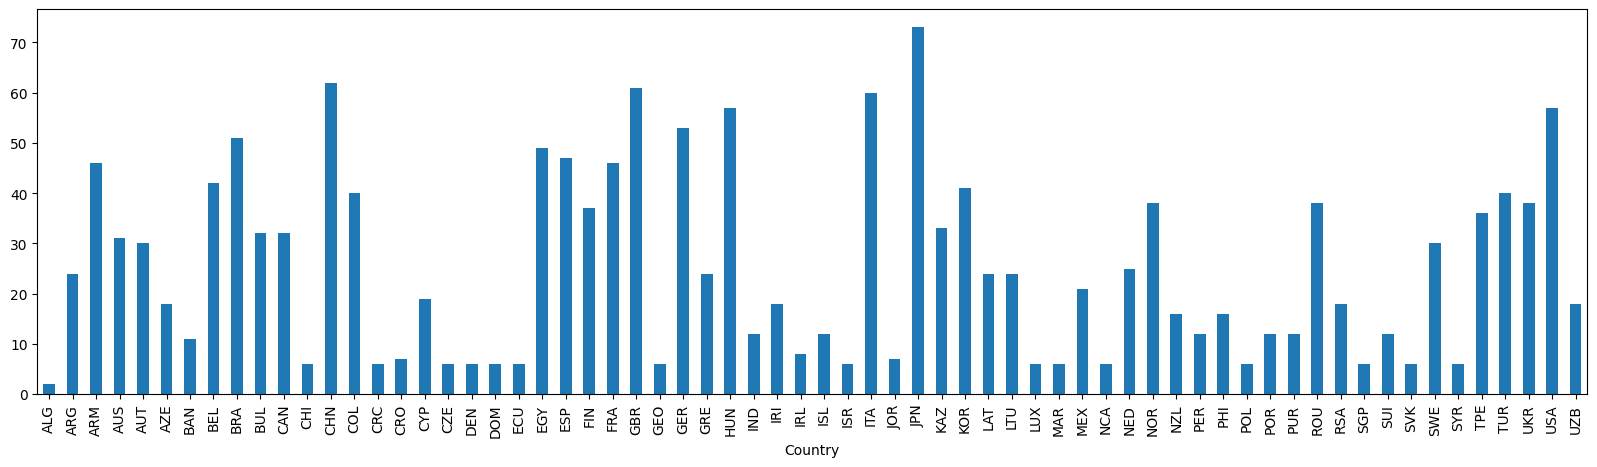

In [157]:
# dataframe with countries data
country_list = gymnastics_result[['Country']].groupby(gymnastics_result['Country']).count()

# change column name
country_list.columns = ['Sum of results']
country_list.reset_index(inplace=True)

# plot simply chart
country_list.plot(x = 'Country',
                  y = 'Sum of results',
                  kind='bar',
                  legend = False,
                  figsize=(20,5))

A quick look at the chart above is enough to understand that the division by country of origin will be harmful because we do not have enough data.
To eliminate the disproportions in the results, I decided to group countries based on their location on the map, official language or common history.
A description of each group along with a list of the countries they belong to can be found below.

1. __Group 1__ - _Asia_ - Japan (JPN), China (CHN), South Korea (KOR), Philippines (PHI), Singapore (SGP), Taiwan (TPE)

2. __Group 2__ - _Scandinavia_ - Sweden (SWE), Denmark (DEN), Norway (NOR), Finland (FIN), Iceland (ISL)

3. __Group 3__ - _Latin America_ - Columbia (COL), Brazil (BRA), Mexico (MEX), Argentina (ARG), Puerto Rico (PUR), Ecuador (ECU), Chile (CHI), Dominican Republic (CHI), Costa Rica(CRC)

4. __Group 4__ - _English-speaking countries_ - Great Britain (GBR), Ireland (IRL), Australia (AUS), New Zealand (NZL), United States (USA), Canada (CAN)

5. __Group 5__ - _Benelux and German - speaking countries_ - Germany (GER), Netherlands (NED), Austria(AUT), Belgium (BEL), Switzerland (SUI), Luxemburg (LUX)

6. __Group 6__ - Other Western European countries_ - Italy (ITA), Spain (ESP), France (FRA), Portugal (POR)

7. __Group 7__  - _Central Europen countries_ - Poland (POL), Czech Republic (CZE), Slovakia (SVK), Lativia (LAT), Lithuania (LTU), Hungary (HUN)

8. __Group 8__ - _Estern European countries_ - Ukraine (UKR), Georgia (GEO), Armenia (ARM), Azerbaijan (AZE), Uzbekistan (UZB), Kazakhstan (KAZ)

9. __Group 9__ - South European countries_ - Romania (ROU), Bulgaria (BUL), Croatia (CRO), Turkey (TUR), Cyprus (CYP), Greece (GRE), Israel (ISR)

10. __Group 10__ - _Other countries_ - Egypt (EGY), Jordan (JOR), Bangladesh (BAN), Indie (IND), Syria (SYR), Marocco (MAR), Algeria (ALG), Nicaragua (NCA), South Africa (RSA)

Of course, these countries can be classified in a completely different way, but this is one of the proposals to solve the problem of data disproportions that we have defined.

In [158]:
# build a dictionary with group classification
country_classification = {
    1 : ['JPN', 'CHN', 'KOR', 'PHI', 'SGP', 'TPE'],
    2 : ['SWE', 'ISL', 'DEN', 'FIN', 'NOR'],
    3 : ['COL', 'BRA', 'MEX', 'ARG', 'PUR', 'ECU', 'PER', 'CRC', 'CHI', 'DOM'],
    4 : ['AUS', 'GBR', 'IRL', 'USA', 'CAN', 'NZL'],
    5 : ['GER', 'NED', 'BEL', 'LUX', 'SUI', 'AUT'],
    6 : ['ITA', 'FRA', 'ESP', 'POR'],
    7 : ['SVK', 'LTU', 'LAT', 'POL', 'CZE', 'HUN'],
    8 : ['ARM', 'UKR', 'GEO', 'KAZ', 'UZB', 'IRI', 'AZE'],
    9 : ['ROU', 'BUL', 'CRO', 'TUR', 'CYP', 'GRE', 'ISR'],
    10 : ['EGY', 'JOR', 'NCA', 'RSA', 'BAN', 'IND', 'SYR', 'MAR', 'ALG']
}

# change values in table with results
for i, r in gymnastics_result.iterrows():
    if r['Country'] in country_classification[1]:
        gymnastics_result.at[i, 'Country'] = 'Asia'
    elif r['Country'] in country_classification[2]:
        gymnastics_result.at[i, 'Country'] = 'Scandinavia'
    elif r['Country'] in country_classification[3]:
        gymnastics_result.at[i, 'Country'] = 'Latin America'
    elif r['Country'] in country_classification[4]:
        gymnastics_result.at[i, 'Country'] = 'English speaking'
    elif r['Country'] in country_classification[5]:
        gymnastics_result.at[i, 'Country'] = 'German speaking and Benelux'
    elif r['Country'] in country_classification[6]:
        gymnastics_result.at[i, 'Country'] = 'other Wester Europen'
    elif r['Country'] in country_classification[7]:
        gymnastics_result.at[i, 'Country'] = 'Central Europe'
    elif r['Country'] in country_classification[8]:
        gymnastics_result.at[i, 'Country'] = 'Eastern Europe'
    elif r['Country'] in country_classification[9]:
        gymnastics_result.at[i, 'Country'] = 'South Europe'
    elif r['Country'] in country_classification[10]:
        gymnastics_result.at[i, 'Country'] = 'Other Countries'

Let's check how the results break down now.

<Axes: xlabel='Country'>

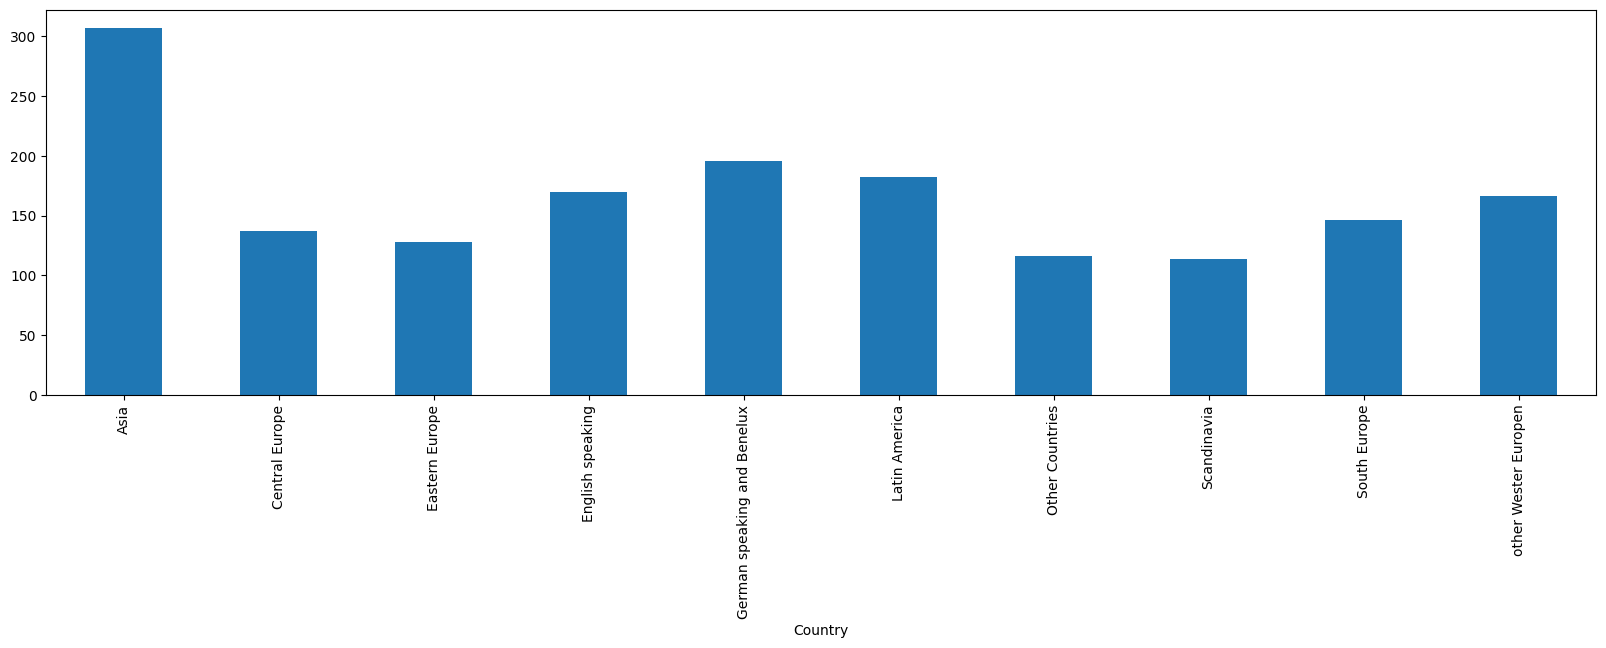

In [159]:
# plot chart for gruped data
gymnastics_result[['Country','Total Score']].groupby(['Country']).count().plot(kind='bar', legend = False, figsize=(20,5))

This time the distribution looks much better. Although we still observe disproportions (especially between the amount of data for Asian players), the results for other countries look much better.

Thanks to all these operations, we have data ready to take a closer look at them and find relationships that will allow us to build our model!

> A few words of commentary on the data we got rid of during the entire process:
>
> __VT_Total_Score__ - a column containing the average of two jumps, for the purposes of this project we will not need the final score, we will rely on individual vault.
>
>__AA_Score__ - sum of all scores in all around - as in the case of values earlier - in this project I will not focus on the sum of the results, but I will take into account individual components.
>

---

## STEP 3 - Data Exploration

After a long, but important introduction, we can start data exploration!

Thanks to the simple __describe__ function, we can quickly see the basic mathematical description for each column.

In [160]:
# print description for each column
gymnastics_result.describe(include='all')

,Country,Category,Apparatus,DScore,EScore,Total Score,Penalty,Rank
count,1662,1662,1662,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000
unique,10,2,6,NaN,NaN,NaN,NaN,NaN
top,Asia,junior,VT,NaN,NaN,NaN,NaN,NaN
freq,307,910,292,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.577978,8.082511,12.616326,-0.044164,61.738267
std,NaN,NaN,NaN,0.897100,0.846042,1.340438,0.286395,36.886659
min,NaN,NaN,NaN,0.800000,4.066000,3.600000,-6.300000,1.000000
25%,NaN,NaN,NaN,4.000000,7.666000,12.000000,0.000000,30.000000
50%,NaN,NaN,NaN,4.600000,8.233000,12.800000,0.000000,59.000000
75%,NaN,NaN,NaN,5.200000,8.700000,13.500000,0.000000,91.000000


Ok, but it's just one table and doesn't tell us much other than two things:

1. We can see differences between the number of points scored by _seniors_ and _juniors_.

2. By looking at the minimum and average values, we can quickly identify the occurrence of outliers in the `"DScore", "EScore", "Total Score", "Penalty"` columns.

Let's start with the first conclusion and try to develop it.

Category               junior      senior
DScore      count  910.000000  752.000000
            mean     4.077363    5.183777
            std      0.728618    0.682814
            min      0.800000    2.800000
            25%      3.800000    4.800000
            50%      4.100000    5.200000
            75%      4.600000    5.600000
            max      5.900000    6.900000
EScore      count  910.000000  752.000000
            mean     8.186601    7.956552
            std      0.861329    0.810020
            min      4.066000    4.133000
            25%      7.766000    7.600000
            50%      8.433000    8.066000
            75%      8.800000    8.466000
            max      9.700000    9.500000
Total Score count  910.000000  752.000000
            mean    12.206821   13.111871
            std      1.317264    1.193577
            min      3.600000    4.533000
            25%     11.666000   12.524750
            50%     12.483000   13.166000
            75%     13.033000   13.900000
            max     14.666000   16.166000
Penalty     count  910.000000  752.000000
            mean    -0.057143   -0.028457
            std      0.354336    0.170263
            min     -6.300000   -3.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      0.000000    0.000000
            max      0.000000    0.000000
Rank        count  910.000000  752.000000
            mean    65.772527   56.856383
            std     39.128064   33.356056
            min      1.000000    1.000000
            25%     33.000000   28.000000
            50%     62.500000   55.000000
            75%     98.000000   85.000000
            max    145.000000  123.000000

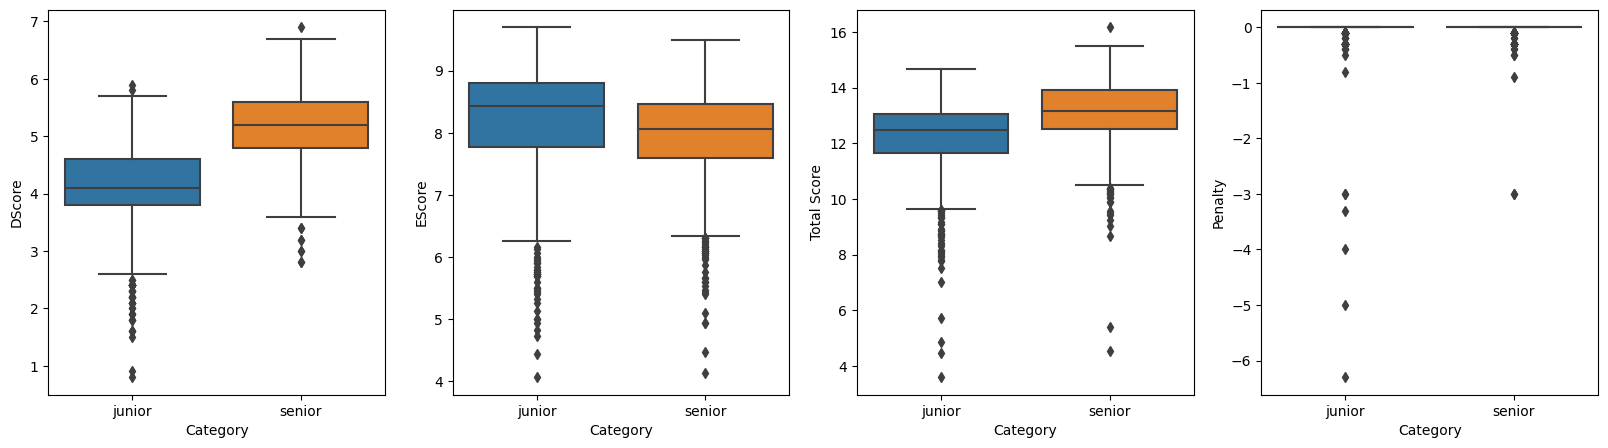

In [161]:
# plot area of chart
fig, axs = plt.subplots(ncols=4,
                        figsize=(20,5))

# first chart
sns.boxplot(data = gymnastics_result,
            x='Category',
            y='DScore',
            ax=axs[0])

# second chart
sns.boxplot(data = gymnastics_result,
            x='Category',
            y='EScore',
            ax=axs[1])

# third chart
sns.boxplot(data = gymnastics_result,
            x='Category',
            y='Total Score',
            ax=axs[2])

# fourth chart
sns.boxplot(data = gymnastics_result,
            x='Category',
            y='Penalty',
            ax=axs[3])

# print table with descrbie function for each Category
gymnastics_result.groupby('Category').describe().T

Using the knowledge of the regulations and numbers in front of us, let's try to draw conclusions and formulate some hypotheses.

* `DScore` - What catches the eye is the higher average for difficult score between the groups, which is easily explained - seniors not only get more points for the requirements in their routines, but can get a higher mark because their routines are assessed at a maximum of 10 elements. Additionally, there are more outliers in the case of juniors than seniors.
* `EScore` - Here the differences are less clear, but the average score for performance is lower among seniors. They not only perform more difficult elements, but also perform more of them, which not only may make more mistakes, but as they become tired, the risk of falling may increase. 
* `Total Score` - As the final grade is the sum of these two grades, it is natural that their average will be a consequence of the above conclusions, which is confirmed by the numbers.
* `Penalty` - Penalties, although they can often decide about a medal, are not something standard and planned in gymnastics (who would want to receive penalties?!), which is why there are few of them. However, as we can see in the chart above, some of them were very severe (__-5.0__ or __-6.0__) which directly translated into the final grade, qualifying it probably as an outlier. Exactly ...

__OUTLIERS - Why this is so important?__

Because outliers can affect your analysis in several ways. They can skew your data and affect the mean and standard deviation, making it difficult to obtain accurate estimates. Outliers can also affect the regression line and lead to incorrect predictions. Therefore, it is crucial to identify and exclude or replace outliers before conducting any analysis.

To look at and understand where the outliers in our data come from, let's look at `Total Score`.

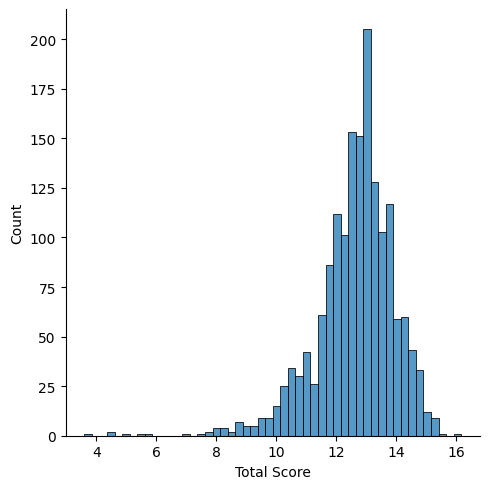

In [162]:
# plot dirtibution chart 
distribution = sns.displot(data = gymnastics_result['Total Score'])

Thanks to this, we can notice a "long tail" on the left side of the graph, which will indicate the presence of outlier data.

Ok, we have the chart, but how do we identify these records in the table? There are several methods for dealing with outliers like Z-Score or Interquartile Range (IQR). Which we should use? If the data is normally distributed, we can use z-score to label points that are farther than three standard deviations away from the mean as outliers. If the data is not normally distributed like in this project, interquartile range or percentage methods to detect outliers are much better.

Interquartile range is a quantity that measures the difference between the first and the third quartiles in a given dataset. 

* The first quartile is also called the one-fourth quartile, or the 25% quartile. If q25 is the first quartile, it means 25% of the points in the dataset have values less than q25.
* The third quartile is also called the three-fourth, or the 75% quartile. If q75 is the three-fourth quartile, 75% of the points have values less than q75.

Using the above notations, IQR = q75 - q25.
Based on the above information, we will identify outlier data using the formula:

* Lower bound: __q25 - 1.5 * IQR__ 
* Upper bound: __q75 + 1.5 * IQR__

Now that we have identified the outliers in our data set, let's take a look at them.

In [163]:
# Value for first and third quartiles
Q1 = gymnastics_result['Total Score'].quantile(0.25)
Q3 = gymnastics_result['Total Score'].quantile(0.75)

# Interquartile range value
IQR = Q3 - Q1

# identify outliers in our dataset based on IRQ method
outliers = gymnastics_result[
    (gymnastics_result['Total Score'] < Q1 - 1.5 * IQR) | 
    (gymnastics_result['Total Score'] > Q3 + 1.5 * IQR)]

# look on our outlier
outliers.head(10)

,Country,Category,Apparatus,DScore,EScore,Total Score,Penalty,Rank
0,Asia,senior,PB,6.9,9.266,16.166,0.0,1
55,Latin America,junior,PH,3.9,5.733,9.633,0.0,129
337,English speaking,junior,PH,4.3,5.266,9.566,0.0,131
504,English speaking,junior,FX,4.3,5.400,9.700,0.0,140
530,Asia,junior,SR,2.6,6.333,8.633,-0.3,130
539,Other Countries,junior,HB,3.5,5.433,8.933,0.0,137
559,Asia,junior,PH,3.2,6.366,9.566,0.0,130
565,Asia,junior,PH,3.6,5.500,9.100,0.0,135
577,Asia,junior,PH,2.5,7.200,9.700,0.0,127
583,Other Countries,junior,PH,2.7,6.000,8.700,0.0,138


This is long table so let's plot a chart to better understand, why this is outliters! Since `Total Score` is a final score, to better understand why it was classified as an outlier, let's look at the value of its individual components.

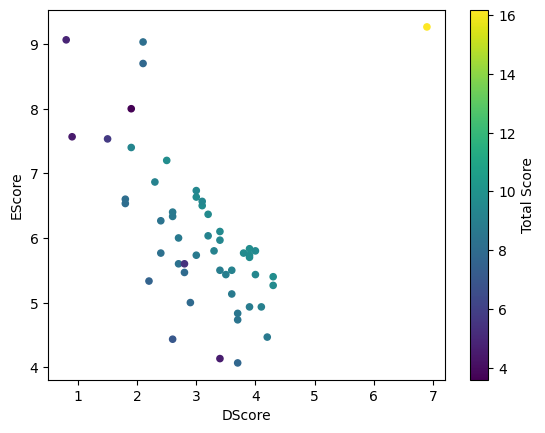

In [164]:
# scatter chart with ouliers data
outliers_chart = outliers.plot.scatter(x = 'DScore',
                                       y = 'EScore',
                                       c = 'Total Score')

Looking at the chart, we can divide all outliers into 3 groups:

* __Extremely high ratings__ - Upper right corner of the chart - best of the best.
* __Grades with a low Difficult Score__ -  Left side of chart - These are grades that do not meet the minimum requirements for `DScore` at international competitions (2,6 for _junior_ and 2,9 for _senior_). This also involves high penalties because negative points are entered in this column for unmet requirements during the exercise.
* __Grades with more than one fall__ - Probably all EScore grades below _7.000_ points. A fall during an exercise is penalized with 1 point from the `EScore`. If the athlete had more falls, the grade is correspondingly lower. This, combined with other deductions, will mean that this one will not count in the competition and will result in good placements and the rating itself will begin to differ significantly from those obtained on average by other competitors. Since the ratings do not include the number of falls, we cannot be sure. There are various combinations of errors that can result in such a low score, but the most common reason is a fall.

Looking at the chart above, it seems intuitive that we will want to discard all ratings below the first quartile. These are most often caused by high penalties, a large number of falls or lack of requirements met, so we can consider them unrepresentative.

We will leave the extremely high ratings because they are so high that we cannot treat them as an error, but as a natural part of the observation.

Before we get rid of all the outliers from our table, let's take a closer look at them on the chart.

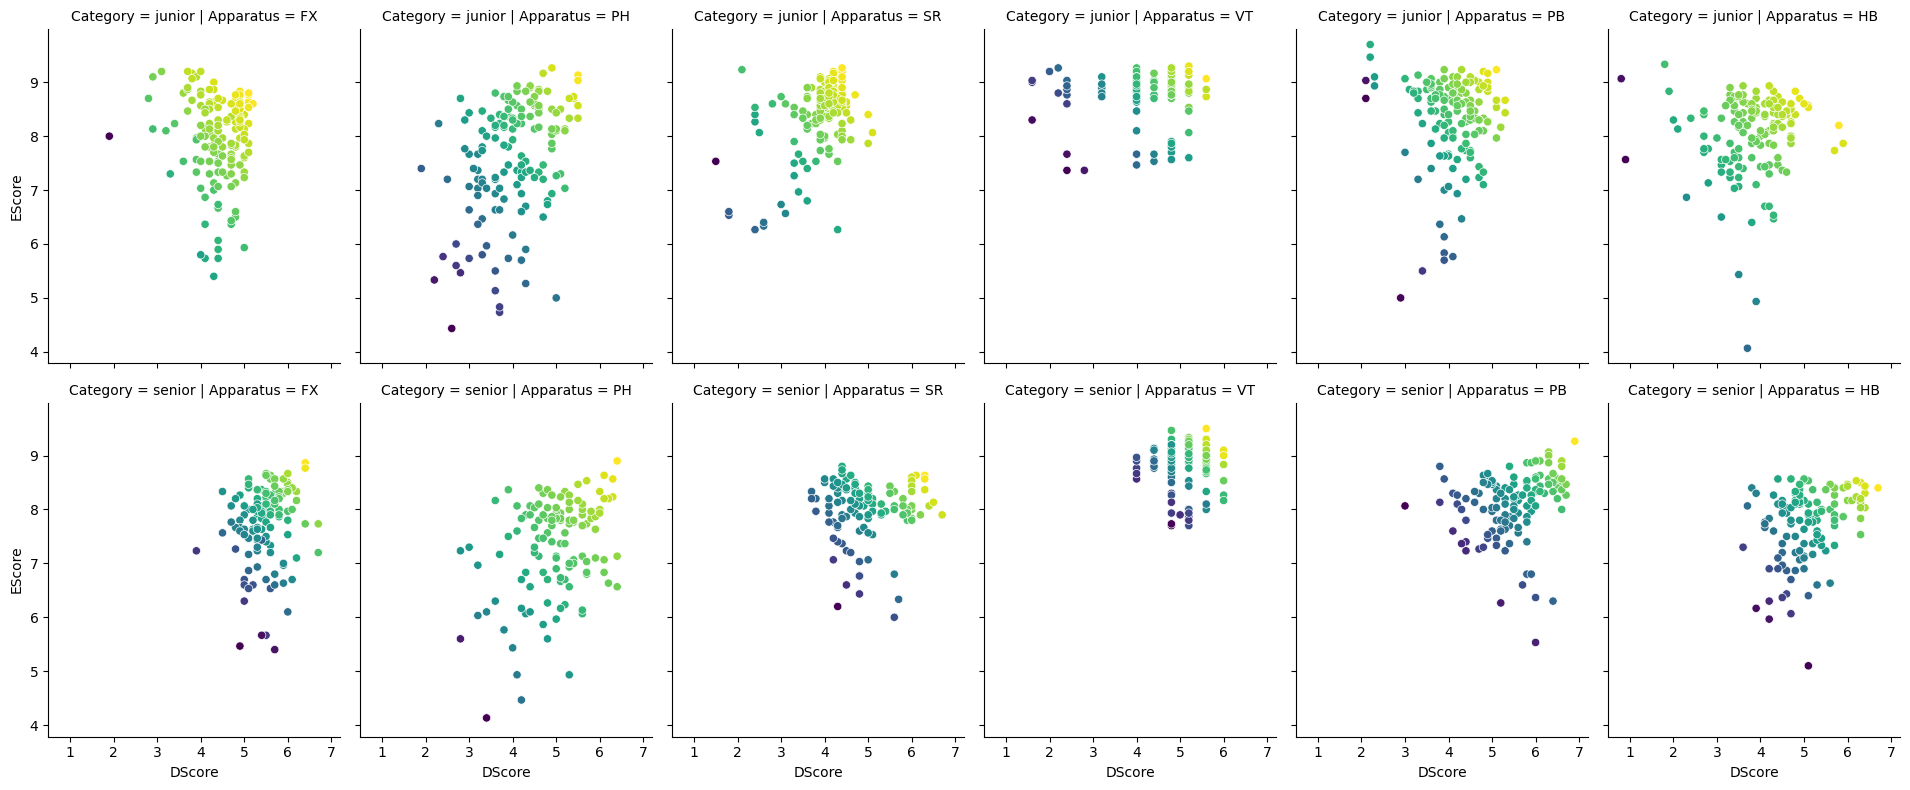

In [165]:
# make are of plot and define rules for charts
outliers_per_apparatus = sns.FacetGrid(gymnastics_result,
                                       row = 'Category',
                                       col = 'Apparatus',
                                       height = 4, aspect = .8)

# print scatter charts by category and apparatus 
outliers_per_apparatus.map_dataframe(sns.scatterplot,
                                     x = 'DScore',
                                     y = 'EScore',
                                     hue = 'Total Score',
                                     palette = 'viridis')

Now that we understand what outliers are and where they come from in our data set, we can get rid of them.

In [166]:
# Variables with litst to loop
category_list = ['junior', 'senior']
apparatus_list = ['FX','PH','SR','VT','PB','HB']
df_without_outlier = []

# Loop for every category and apparatus
for category in category_list:
    for apparatus in apparatus_list:

        # make data frame with matching categories and apparatus
        df = gymnastics_result.loc[
            (gymnastics_result['Category'] == category) &
            (gymnastics_result['Apparatus'] == apparatus)]

        # calculate outliers
        Q1 = df['Total Score'].quantile(0.25)
        Q3 = df['Total Score'].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df['Total Score'] < Q1 - 1.5 * IQR)]

        # drop outliers from data frame
        df.drop(outliers.index, inplace = True)

        # save dataframe to list
        df_without_outlier.append(df)

# Make one dataframe with all data
clean_result = pd.concat(df_without_outlier)

Now that we've gotten rid of all the outliers, we can look at the relationship between each column.

To do this, we need to replace the text in the "Category", "Apparatus" and "Country" columns with numerical values. We can do it in several ways, but I chose the simplest one.

* __Category__ - _0_ for "junior", _1_ - for "senior" 
* __Apparatus__ - Numbers from 0 to 5 for devices in the Olympic order: _FX, PH, SR, VT, PB, HB_
* __Country__ - Numbers from 0 to 9 for countries, according to the order used for classification.

In [167]:
# replace string to number
clean_result.replace({"junior": 0, "senior": 1,
                     "FX":0,"PH":1,"SR":2,"VT":3,"PB":4,"HB":5,
                     "Asia" : 0,
                     "Scandinavia" : 1,
                     "Latin America" : 2,
                     "English speaking" : 3,
                     "German speaking and Benelux": 4,                     
                     "other Wester Europen" : 5,
                     "Central Europe" : 6,
                     'Eastern Europe' : 7,
                     'South Europe' : 8,
                     'Other Countries' : 9
                     }, inplace=True)

Now let's look at the existing data dependencies.

In [168]:
# print correlation matrix for traning dataframe
clean_result.corr()

,Country,Category,Apparatus,DScore,EScore,Total Score,Penalty,Rank
Country,1.000000,-0.052275,-0.002756,-0.261983,-0.095674,-0.261904,-0.062936,0.297236
Category,-0.052275,1.000000,0.011337,0.626128,-0.151070,0.363507,0.057224,-0.106038
Apparatus,-0.002756,0.011337,1.000000,-0.078386,0.185931,0.080929,0.199127,-0.036287
DScore,-0.261983,0.626128,-0.078386,1.000000,-0.009964,0.733283,0.040936,-0.587502
EScore,-0.095674,-0.151070,0.185931,-0.009964,1.000000,0.669322,0.028617,-0.649730
Total Score,-0.261904,0.363507,0.080929,0.733283,0.669322,1.000000,0.116095,-0.884287
Penalty,-0.062936,0.057224,0.199127,0.040936,0.028617,0.116095,1.000000,-0.190980
Rank,0.297236,-0.106038,-0.036287,-0.587502,-0.649730,-0.884287,-0.190980,1.000000


Ok, this table is fantastic! However, if we could make it a bit more readable... Let's use a heatmap for this

<Axes: >

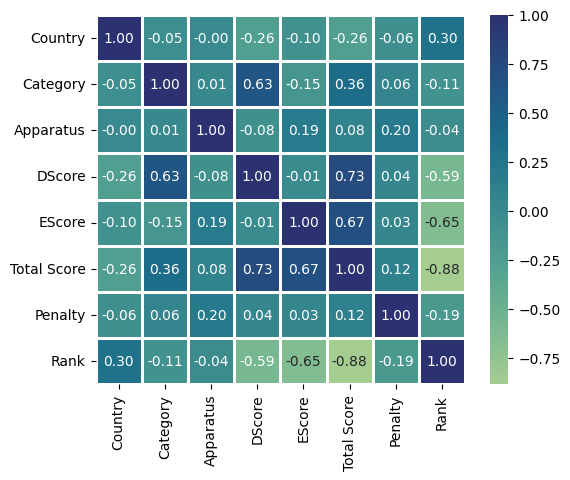

In [169]:
# correlation matrix
corrmat = clean_result.corr()

# print correlations matrix like heatmap
sns.heatmap(corrmat,
            vmax = 1,
            cmap = 'crest',
            square=True,
            annot = True,
            fmt = '.2f',
            linewidths = 1)

The above chart seems much more readable than the table itself. Let's try to draw some conclusions from it. To avoid these conclusions being too chaotic, let's divide them according to the correlations we see.

__Strong correlations__ - from _-1.0_ to _-0.6_ and from _0.6_ to _1.0_

* `Category` - The strongest relationship between the categories is observed for DScore - which is understandable due to the regulations. Consequently, this translates into the final grade, but only moderately.
* `DScore` - This is a very important value for gymnasts, which is also confirmed by our chart. We can see a strong relationship between _DScore_, _Total Score_ and position in the _ranking_. We see a moderate correlation with the region the gymnast comes from.
* `EScore` - We can see a strong correlation between the _EScore_ and the _Total Score_ and the _Rank_. the _EScore_ weakly correlates with variables such as the _region_ the athlete comes from, _category_ and _apparatus_.
* `Total Score` - this rating correlates most strongly with the _Ranking_, but it is quite obvious because it was determined on its basis. The next grade in order is a _DScore_ and _EScore_ with a stronger indication of the former. The gymnast's _region_ of origin and _category_ are moderately correlated with the final grade.
* `Rank` - The one next to the _Total Score_ on the basis of which it was determined correlates most strongly with _EScore_ and _DScore_. We see a moderate correlation with the _region_ the gymnasts come from. The remaining correlations are weak.

__Moderate correlations__ - from _-0.6_ to _-0.3_ and from _0.3_ to _0.6_

* `Country` - the country the athlete comes from moderately correlates with prices such as _DScore_, _Total Score_, and the gymnast's place in the competition.

__Weak correlations__ - from _-0.2_ to _0.2_

* `Apparatus` - The apparatus on which the competitor started in a low manner correlates only with the performance grade and penalties received by the competitors.
* `Penalty` - The penalties that the players received for their exercises were poorly correlated with the _Apparatus_ they exercised on and the _ranking_.

At the very end, let's try to compare our conclusions with reality. If we want to build a model that will allow us to predict a competitor's rating on a each apparatus, we will have to take into account factors such as the _category_ and the _apparatus_ on which he competes, because both of these features differ in the regulations and the method of assessing the gymnasts.

The next conclusion is the _EScore_. Even though this significantly correlates with important data for us, such as _ranking_ and _Total Score_, it itself is highly variable even for the same gymnast, to illustrate this let's use a chart and tables with the players' names, that we saved earlier.

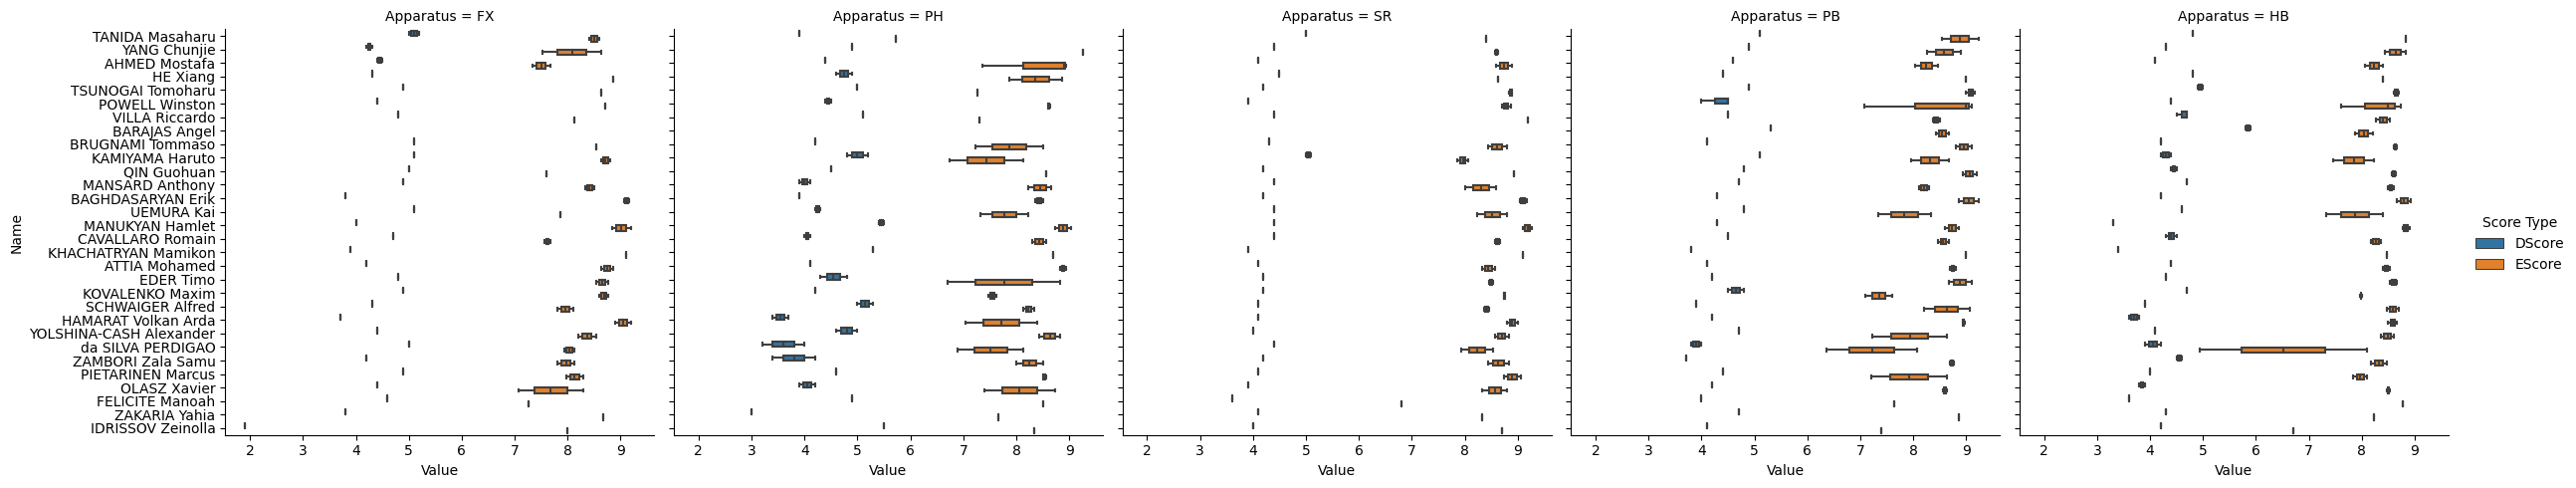

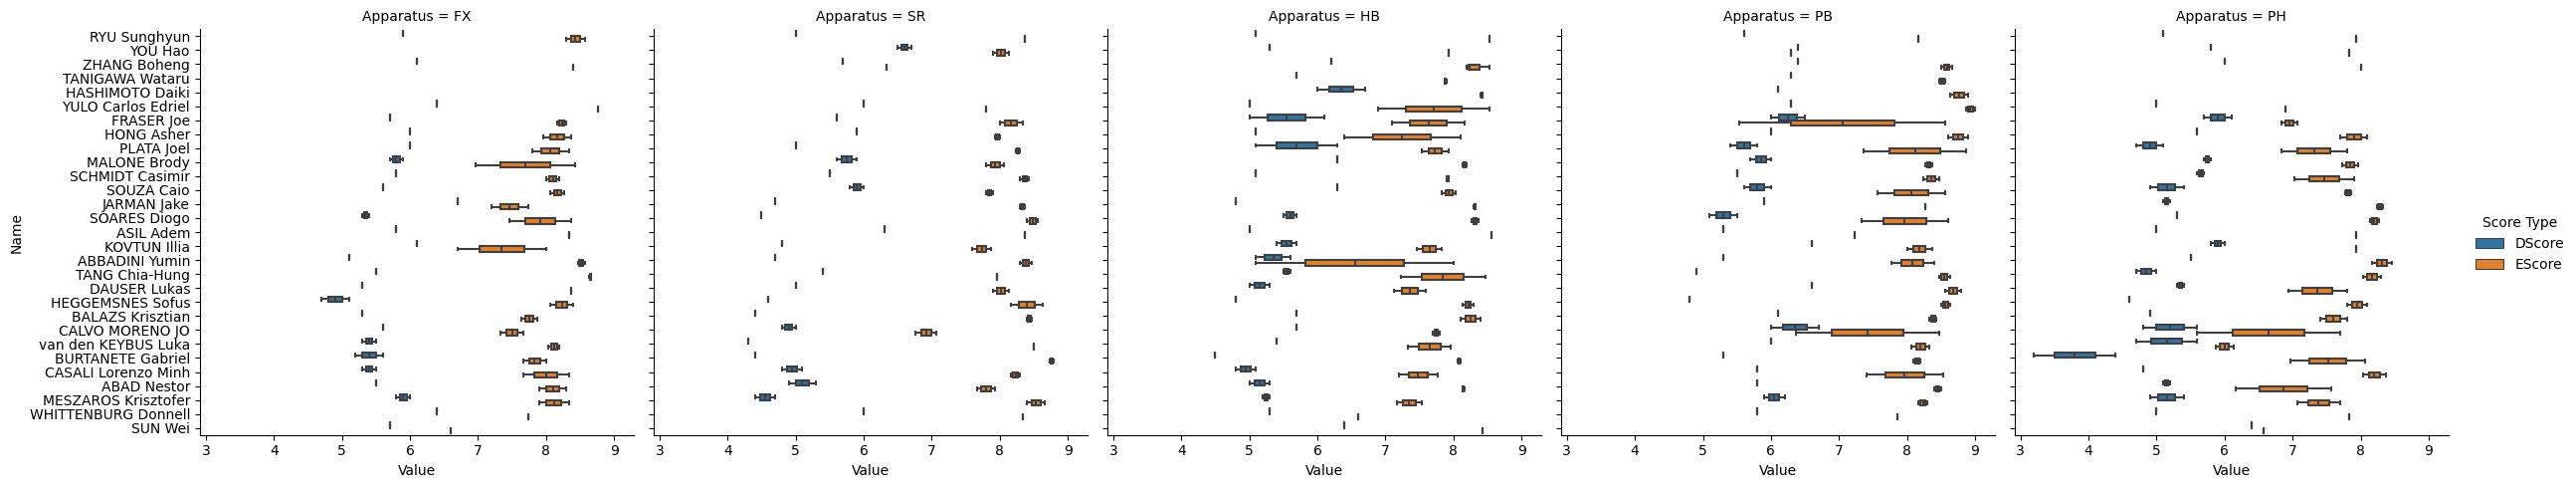

In [170]:
# Table gruped by number of starts per apparatus
EScores_data = gymnastics_result_with_name[['Name','Apparatus','EScore','DScore']].groupby(['Name', 'Apparatus']).count().sort_values(by = 'EScore', ascending = False).reset_index()

# Select the data to compare EScores
Gymnasts_to_compare = EScores_data.loc[
    (EScores_data['Apparatus'] != 'VT') &
    (EScores_data['EScore'] > 1)]

# Make table with EScores for selected gymnasts
EScore = gymnastics_result_with_name[gymnastics_result_with_name['Name'].isin(Gymnasts_to_compare['Name'])]

# Drop unecessary columns
EScore.drop(columns=['Rank','Country','Total Score','Penalty'],
            inplace = True)

EScore.drop(EScore[EScore['Apparatus'] == 'VT'].index,
            inplace = True)

# Melt table 
EScore = pd.melt(EScore,
                 id_vars = ['Name','Category','Apparatus'],
                 var_name = 'Score Type',
                 value_name = 'Value')

# Table for cattegory and apparatus
EScore_junior = EScore[EScore['Category'] == 'junior']

EScore_senior = EScore[EScore['Category'] == 'senior']

# Print chart for our selected data
junior_chart = sns.catplot(data = EScore_junior,
                           col = 'Apparatus',
                           y = 'Name',
                           x = 'Value',
                           hue = 'Score Type',
                           kind = 'box')

senior_chart = sns.catplot(data = EScore_senior,
                           col = 'Apparatus',
                           y = 'Name',
                           x = 'Value',
                           hue = 'Score Type',
                           kind = 'box')


A comment on selected data:

1. Competitors who competed more than once on the same apparatus.
2. Rejection of VT Score - because the `DScore` grade for a jump is reported before it happens, and the `EScore` takes just one element into account, this instrument is immeasurable for our comparison.

As we can see in the charts above, while the `DScore` may be the same in all starts of the same competitor, the `EScore` rating can be very different. Of course, the number of gymnasts we could select from our data was very limited, but this variability is due to the nature of the evaluation itself, not this specific data. To prove this, it would be necessary to collect data for a certain group of players and track the variability of ratings throughout the season.

__Therefore, despite the high correlation of the `EScore`, it will not be taken into account when creating our model.__

In [171]:
# Drop unnecessary data
clean_result.drop(columns=['EScore','Penalty'], inplace = True)

Now that we know what data to choose, let's check what the selected data looks like on the chart.

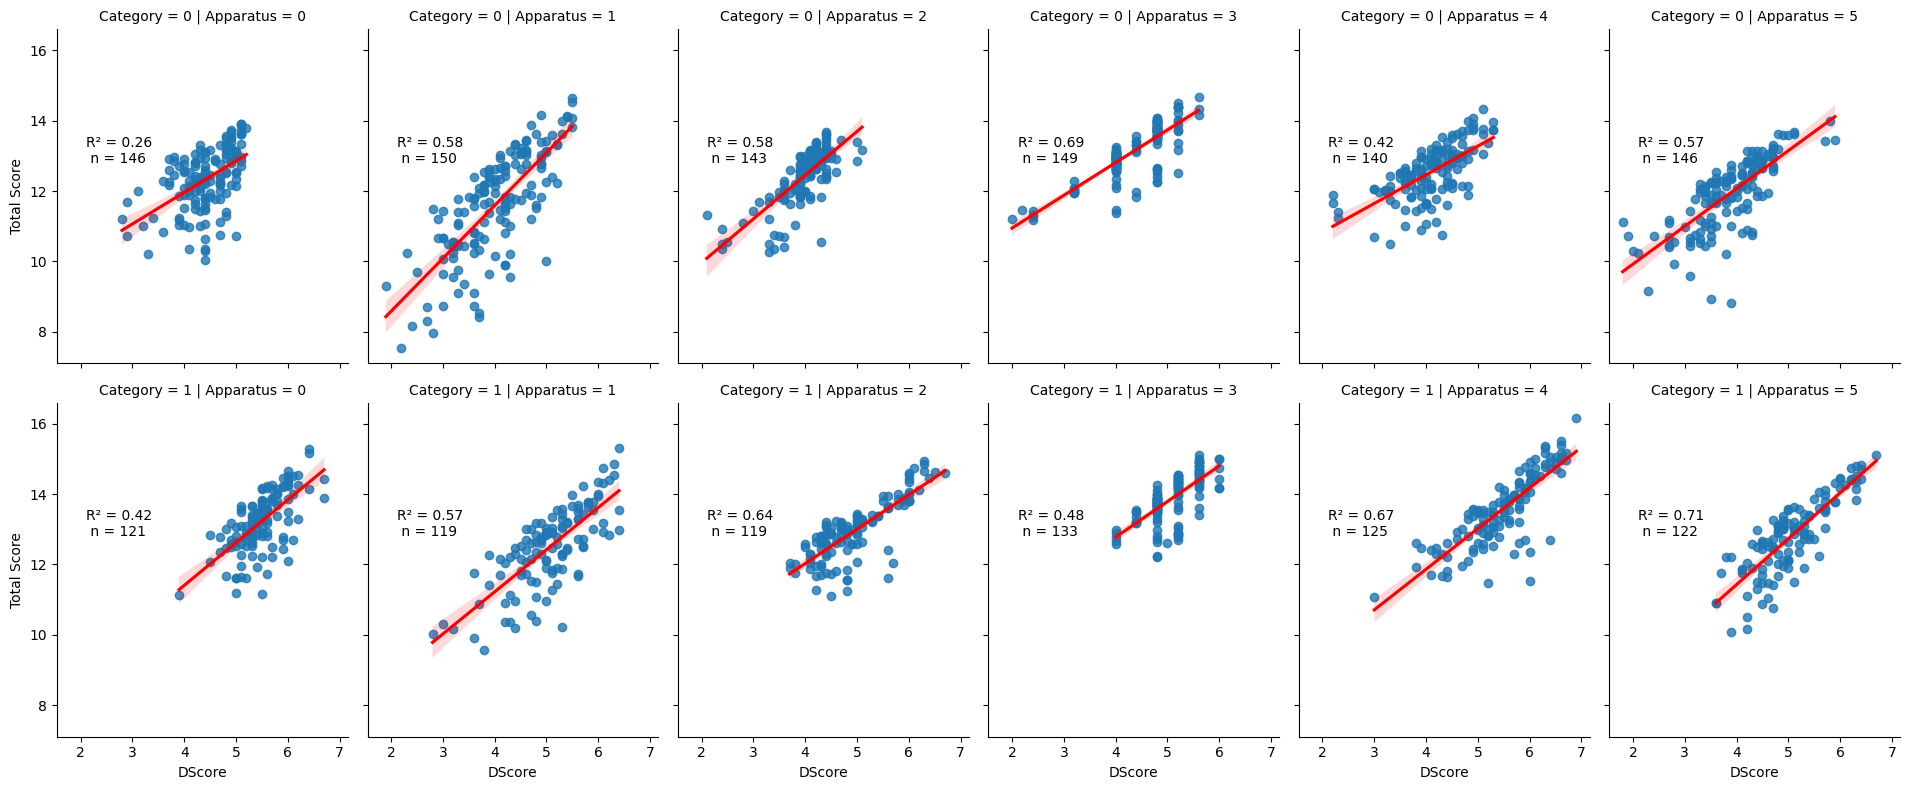

In [172]:
def annotate(data, **kws):
    line = stats.linregress(data['DScore'], data['Total Score'])
    r2 = line.rvalue**2
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6,"R\u00b2 = {:.2f}\n n = {}".format(r2, n),
            transform=ax.transAxes)

correlation_chart = sns.lmplot(clean_result, 
                               x = 'DScore', 
                               y = 'Total Score', 
                               col = 'Apparatus', 
                               row = 'Category',
                               line_kws=dict(color="red"),                               
                               height = 4,
                               aspect = .8)

correlation_chart.map_dataframe(annotate)

Looking at the above graph, we can quickly notice that in some cases a model based on a classic linear function would be a good choice (R2 = 0.71). How to understand ? The simplest explanation will be that nearly 70% of the `Total Score` can be explained by the determined linear function formula based on `DScore`. But... in the case of other apparatus, based on the same data we will be able to explain only 26% of the assessments. This is a bad result. But how will we know which model to choose?

---

## Step 4 - Building a model

Before we start building our model, let's remember what we expect. Based on data such as the _category_, the _country_ the gymnast comes from, apparatus and the _difficult score_, we want to know the predictable _total score_ and, consequently, the position in world championship competitions.

Why these factors? Because all of them are objective and known before the competition.

* __Category__ - The category is determined by the age of the competitor - seniors are over 18 years of age, juniors are younger gymnasts.

* __Country__ - there are countries and regions that have been at the forefront of competition on individual instruments for years. With this data, we can not only check whether this is an important factor, but also use it to predict grades.

* __Difficult Score__ - this is the only rating known before the competition. During training and tests before the competition, the athlete not only strives for it to be as high as possible, but also to be stable, giving a predictable final result based on which further work is planned.

* __Apparatus__ - The ratings on individual instruments differ from each other. As we have shown earlier, it will be important which of them the gymnast starts in to predict his grade as accurately as possible.

Ok, if we already know what we expect, we can start choosing the right model. How will we know how to do this? Of course, there are many paths and guides. In addition to basic knowledge of statistics and econometrics, it is worth using the documentation of the libraries used. On the scikit - learn website you will find the cheat - sheet algorithm. Let's use it!

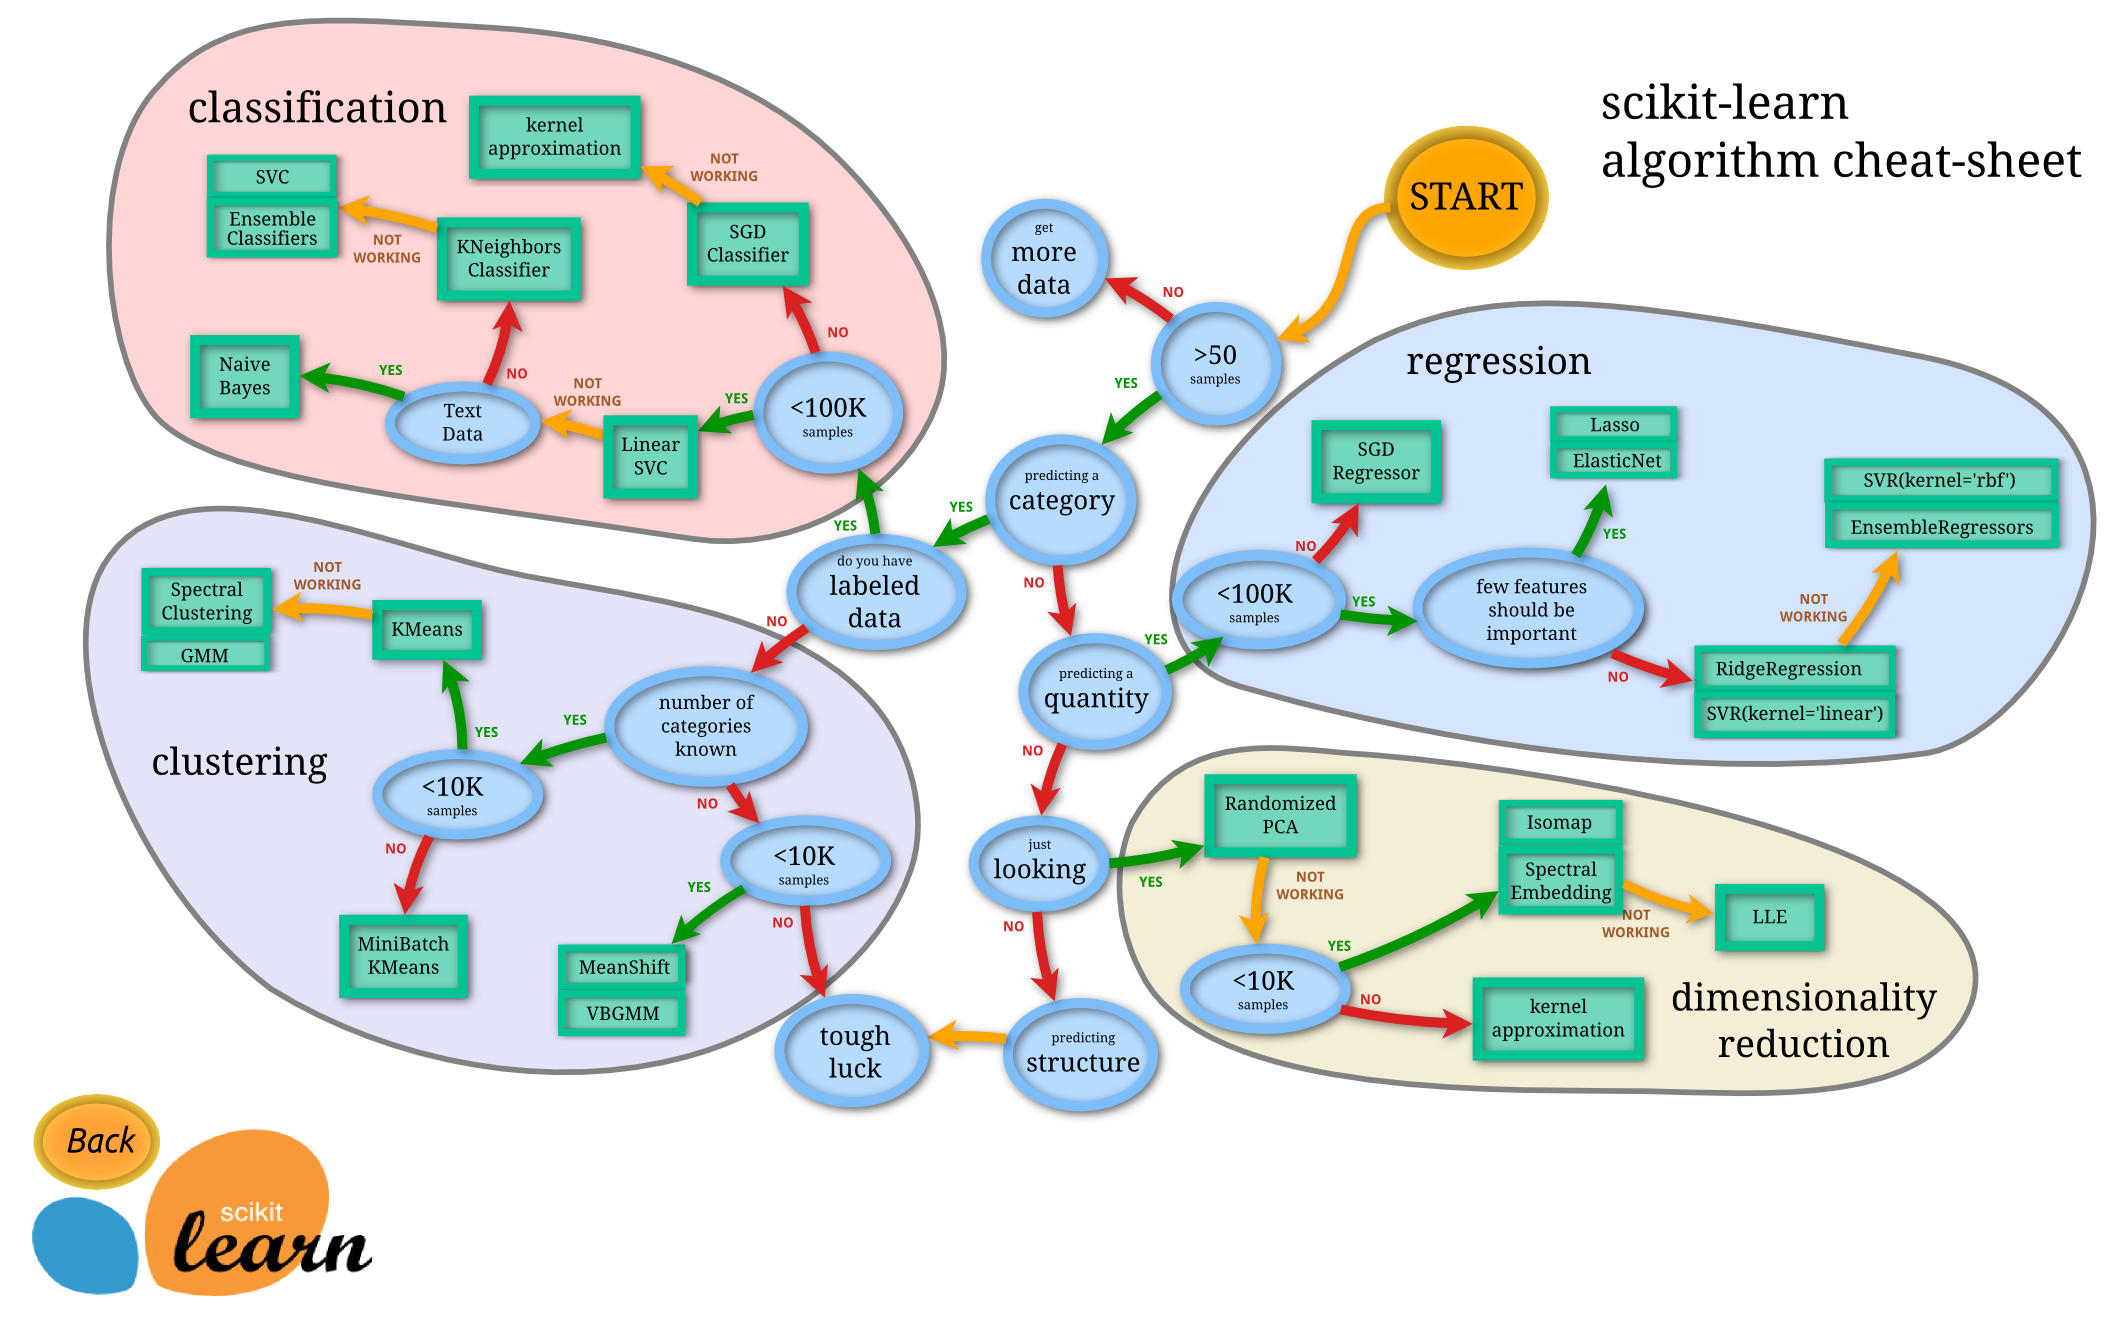

1. Do we have more than 50 samples? __Luckily, yes!__

2. Will we assign data to appropriate categories? __Not in this project__

3. Do we want to predict the indicated value based on the remaining data in the table? __Yes__

This is how we got to the first subset, which is regressions! What is regression? Is a statistical method for analyzing the relationship between a dependent variable and one or more independent variables. It is used to: 
* __Determine__ the strength and direction of the relationship between variables. This can be done by calculating a correlation coefficient, which ranges from -1 to 1.

* __Predict__ the value of the dependent variable for a given value of the independent variable. This can be done by calculating a regression equation, which is a mathematical formula that describes the relationship between the variables.

Looks like we're in the right place!

4. Do we have more than 100K samples. __Nope__

5. Few features will be important? __Yes__

And this way we reached two recommended models:

* [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

* [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

Is that all? Certainly not, but we will start building our model here. Creating models using ready-made libraries is really simple and takes only a few lines. However, as is the case in such cases, the devil is in the details.

The key aspect is not only selecting the right model, but also its parameters so that it is as accurate as possible in its predictions. There are several ways to measure the accuracy of models. For this project I chose:
* R<sup>2</sup>	
* Mean absolute error (MAE)
* Mean squared error (MSE)
* Mean absolute percentage error (MAPE)
* MAX Error

---

### Lasso model

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import sklearn.metrics

# Load and prepare data
X = clean_result[['Category','Country','Apparatus','DScore']]
Y = clean_result[['Total Score']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.28, random_state=42)

# Train Lasso model
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(x_train, y_train)

# print accuracy score
print(' R\u00b2 = ' f'{lasso_model.score(x_test,y_test):.2f}\n', # R2 score for Lasso model
      'MAE = ' f'{sklearn.metrics.mean_absolute_error(lasso_model.predict(x_test),y_test):.2f}\n', # MAE for Lasso model
      'MSE = ' f'{sklearn.metrics.mean_squared_error(lasso_model.predict(x_test),y_test):.2f}\n', # MSE for Lasso model
      'MAPE = ' f'{sklearn.metrics.mean_absolute_percentage_error(lasso_model.predict(x_test),y_test):.2%}\n', # MAPE for Lasso model
      'MAX error = ' f'{sklearn.metrics.max_error(lasso_model.predict(x_test),y_test):.3f}') # MAX error for Lasso model)

# save accuracy score to ditcionary
models_accuracy = {
    "Lasso model" : [f'{lasso_model.score(x_test,y_test):.2f}', # R2 score for Lasso model
                     f'{sklearn.metrics.mean_absolute_error(lasso_model.predict(x_test),y_test):.2f}', # MAE for Lasso model
                     f'{sklearn.metrics.mean_squared_error(lasso_model.predict(x_test),y_test):.2f}', # MSE for Lasso model
                     f'{sklearn.metrics.mean_absolute_percentage_error(lasso_model.predict(x_test),y_test):.2%}', # MAPE for Lasso model
                     f'{sklearn.metrics.max_error(lasso_model.predict(x_test),y_test):.3f}'] # MAX error for Lasso model
} 

 R² = 0.57
 MAE = 0.60
 MSE = 0.63
 MAPE = 4.80%
 MAX error = 3.476


---

### ElasticNet model

In [180]:
from sklearn.linear_model import ElasticNet

# Load and prepare data
X = clean_result[['Category','Country','Apparatus','DScore']]
Y = clean_result[['Total Score']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train ElasticNet model
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.1)
elasticnet_model.fit(X_train, y_train)

# print accuracy score
print(' R\u00b2 = ' f'{elasticnet_model.score(x_test,y_test):.2f}\n', # R2 score for Lasso model
      'MAE = ' f'{sklearn.metrics.mean_absolute_error(elasticnet_model.predict(x_test),y_test):.2f}\n', # MAE for Lasso model
      'MSE = ' f'{sklearn.metrics.mean_squared_error(elasticnet_model.predict(x_test),y_test):.2f}\n', # MSE for Lasso model
      'MAPE = ' f'{sklearn.metrics.mean_absolute_percentage_error(elasticnet_model.predict(x_test),y_test):.2%}\n', # MAPE for Lasso model
      'MAX error = ' f'{sklearn.metrics.max_error(elasticnet_model.predict(x_test),y_test):.3f}') # MAX error for Lasso model)

# save accuracy score to ditcionary
models_accuracy['ElasticNet model'] = [f'{elasticnet_model.score(x_test,y_test):.2f}', # R2 score for Lasso model
                     f'{sklearn.metrics.mean_absolute_error(elasticnet_model.predict(x_test),y_test):.2f}', # MAE for Lasso model
                     f'{sklearn.metrics.mean_squared_error(elasticnet_model.predict(x_test),y_test):.2f}', # MSE for Lasso model
                     f'{sklearn.metrics.mean_absolute_percentage_error(elasticnet_model.predict(x_test),y_test):.2%}', # MAPE for Lasso model
                     f'{sklearn.metrics.max_error(elasticnet_model.predict(x_test),y_test):.3f}'] # MAX error for Lasso model

 R² = 0.57
 MAE = 0.60
 MSE = 0.63
 MAPE = 4.79%
 MAX error = 3.557


---

### Neural Network 

In [181]:
from sklearn.neural_network import MLPRegressor

# Separate features and target
X = clean_result[['Category','Country','Apparatus','DScore']]
Y = clean_result[['Total Score']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create and train the neural network model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,50,25,), activation='relu', solver='adam', learning_rate_init=0.001, alpha=1)
mlp_model.fit(x_train, y_train)

# print accuracy score
print(' R\u00b2 = ' f'{mlp_model.score(x_test,y_test):.2f}\n', # R2 score for Lasso model
      'MAE = ' f'{sklearn.metrics.mean_absolute_error(mlp_model.predict(x_test),y_test):.2f}\n', # MAE for Lasso model
      'MSE = ' f'{sklearn.metrics.mean_squared_error(mlp_model.predict(x_test),y_test):.2f}\n', # MSE for Lasso model
      'MAPE = ' f'{sklearn.metrics.mean_absolute_percentage_error(mlp_model.predict(x_test),y_test):.2%}\n', # MAPE for Lasso model
      'MAX error = ' f'{sklearn.metrics.max_error(mlp_model.predict(x_test),y_test):.3f}') # MAX error for Lasso model)

# save accuracy score to ditcionary
models_accuracy['Neural Network'] = [f'{mlp_model.score(x_test,y_test):.2f}', # R2 score for Lasso model
                     f'{sklearn.metrics.mean_absolute_error(mlp_model.predict(x_test),y_test):.2f}', # MAE for Lasso model
                     f'{sklearn.metrics.mean_squared_error(mlp_model.predict(x_test),y_test):.2f}', # MSE for Lasso model
                     f'{sklearn.metrics.mean_absolute_percentage_error(mlp_model.predict(x_test),y_test):.2%}', # MAPE for Lasso model
                     f'{sklearn.metrics.max_error(mlp_model.predict(x_test),y_test):.3f}'] # MAX error for Lasso model

 R² = 0.67
 MAE = 0.53
 MSE = 0.49
 MAPE = 4.27%
 MAX error = 3.136


In [182]:
summary = pd.DataFrame.from_dict(models_accuracy, orient='index')

In [183]:
summary

,0,1,2,3,4
Lasso model,0.57,0.60,0.63,4.80%,3.476
ElasticNet model,0.57,0.60,0.63,4.79%,3.557
Neural Network,0.67,0.53,0.49,4.27%,3.136
